In [28]:
# \\DISC
cwd = "..\\..\\"
cwd_Images_Raw = cwd + "\\Sentinel-2 Images Raw"
cwd_Images_Processed = cwd + "\\Sentinel-2 Images Processed"
cwd_Images_Results = cwd + "\\Results"

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
# Read .csv
df_HI = pd.read_csv(cwd_Images_Results + "\\HI SepROI MinMax Average 91 Sites.csv")
df_HI.head()

,Site,HI 100,HI 300,HI 600,HI 900,HI Total
0,GHNA,0.000000,0.000000,0.000000,0.000000,0.000000
1,KEN-KAP,0.000009,0.000054,0.000108,0.000073,0.000061
2,AT-Mmg,0.000256,0.000093,0.000121,0.000133,0.000151
3,Dahara (Senegal),0.000401,0.000117,0.000131,0.000094,0.000186
4,SE-Svb,0.000637,0.000158,0.000393,0.000642,0.000458


In [31]:
df_HI['Homo Test'] = df_HI.apply(lambda x: 'Yes' if x['HI Total'] <= 0.01 else 'No', axis = 1)
df_HI

,Site,HI 100,HI 300,HI 600,HI 900,HI Total,Homo Test
0,GHNA,0.000000,0.000000,0.000000,0.000000,0.000000,Yes
1,KEN-KAP,0.000009,0.000054,0.000108,0.000073,0.000061,Yes
2,AT-Mmg,0.000256,0.000093,0.000121,0.000133,0.000151,Yes
3,Dahara (Senegal),0.000401,0.000117,0.000131,0.000094,0.000186,Yes
4,SE-Svb,0.000637,0.000158,0.000393,0.000642,0.000458,Yes
...,...,...,...,...,...,...,...
86,LOBE,0.000115,0.007918,0.474829,0.481349,0.241053,No
87,S. KOREA-FOR 2,0.151571,0.257342,0.307438,0.389650,0.276500,No
88,S. KOREA-FOR 1,0.047840,0.276321,0.606257,0.596950,0.381842,No
89,DE-SEL,0.000029,0.297755,0.833436,0.511600,0.410705,No


In [32]:
df_Network = pd.read_excel(cwd + "\\Site - With Moved ROI (Coordinates Only).xlsx")
df_Network.head()

,Number,Site,Latitude,Longitude,Reference network
0,1,ATGE,52.466778,12.959778,HYPERNET
1,2,ATLAS-Mohammed V,33.406152,-5.103319,Other
2,3,ATLAS-Mohammed V New,33.404814,-5.101614,Other
3,4,AT-Mmg,47.316700,10.970300,FLOX
4,5,BASP,39.049139,-2.075917,HYPERNET


In [33]:
df_ECO = pd.read_excel(cwd + "\\Flox_sites_table_final_PFT_correct.xlsx", sheet_name = 'With-forest')
df_ECO = df_ECO.drop(columns = (['Homogeneity test passed']))
df_ECO.head()

,Number,Site code,Site name,Country,LAT,LON,Main ecosystem,FLOX Active,Network,Link
0,1,AT-Mmg,Mieming,Austria,47.3167,10.9702,Evergreen Forest,Yes,NaN,https://www.europe-fluxdata.eu/home/site-detai...
1,2,BE-Bra,Brasschaat,Belgium,51.3077,4.5198,Evergreen Forest,Yes,ICOS,https://meta.icos-cp.eu/resources/stations/ES_...
2,3,BE-WAL,BE - WAL,Belgium,50.5516,4.7461,Crop,No,NaN,https://essd.copernicus.org/articles/16/1283/2...
3,4,Tapajos KM67 Mature Forest site,Tapajos KM67,Brasil,-2.8567,-54.9589,Evergreen Forest,Planned,NaN,NaN
4,5,CANADA-ONT,Ontario,Canada,42.7102,-80.3573,Evergreen Forest,Yes,NaN,NaN


In [34]:
df_FLOX = pd.merge(left = df_HI, right = df_Network, on = 'Site')
df_FLOX = df_FLOX[df_FLOX['Reference network'].str.contains("FLOX")]
df_FLOX = df_FLOX[~df_FLOX['Site'].str.contains("New")]
df_FLOX = pd.merge(left = df_FLOX, right = df_ECO, left_on="Site", right_on="Site code")
df_FLOX = df_FLOX.reset_index(drop = True)
df_FLOX = df_FLOX[['Site','HI Total','Homo Test', 'Main ecosystem', 'FLOX Active','Reference network','Latitude','Longitude','Site name','Country','Link']]
df_FLOX.head()

,Site,HI Total,Homo Test,Main ecosystem,FLOX Active,Reference network,Latitude,Longitude,Site name,Country,Link
0,KEN-KAP,0.000061,Yes,Savannah,Possible,FLOX,-1.6144,37.1338,Kapiti,Kenya,NaN
1,AT-Mmg,0.000151,Yes,Evergreen Forest,Yes,FLOX,47.3167,10.9703,Mieming,Austria,https://www.europe-fluxdata.eu/home/site-detai...
2,NED-ESSEN,0.000796,Yes,Evergreen Forest,No,FLOX,52.1665,5.7436,Essen,Netherlands,NaN
3,US ALASKA 1,0.001014,Yes,Tundra,Possible,FLOX,71.2800,-156.6092,US ALASKA 1,USA,NaN
4,KEN-1,0.001266,Yes,Crop,Not known,FLOX,-3.4262,38.1406,KEN - 1,Kenya,NaN


In [35]:
# Export
df_FLOX.to_csv(cwd + "\\FLOX Final.csv", index = False)

In [36]:
# Filter the sites which passed homogeneity test
df_Passed = df_FLOX[df_FLOX['Homo Test'] == 'Yes']
df_Passed.head()

,Site,HI Total,Homo Test,Main ecosystem,FLOX Active,Reference network,Latitude,Longitude,Site name,Country,Link
0,KEN-KAP,0.000061,Yes,Savannah,Possible,FLOX,-1.6144,37.1338,Kapiti,Kenya,NaN
1,AT-Mmg,0.000151,Yes,Evergreen Forest,Yes,FLOX,47.3167,10.9703,Mieming,Austria,https://www.europe-fluxdata.eu/home/site-detai...
2,NED-ESSEN,0.000796,Yes,Evergreen Forest,No,FLOX,52.1665,5.7436,Essen,Netherlands,NaN
3,US ALASKA 1,0.001014,Yes,Tundra,Possible,FLOX,71.2800,-156.6092,US ALASKA 1,USA,NaN
4,KEN-1,0.001266,Yes,Crop,Not known,FLOX,-3.4262,38.1406,KEN - 1,Kenya,NaN


In [37]:
# Group by the main ecosystem
df_Passed_Grouped = df_Passed.groupby('Main ecosystem').count()
df_Passed_Grouped = df_Passed_Grouped.reset_index()
df_Passed_Grouped

,Main ecosystem,Site,HI Total,Homo Test,FLOX Active,Reference network,Latitude,Longitude,Site name,Country,Link
0,Crop,2,2,2,2,2,2,2,2,2,0
1,Deciduous Forest,4,4,4,4,4,4,4,4,4,0
2,Evergreen Forest,13,13,13,13,13,13,13,13,13,5
3,Grasslands,3,3,3,3,3,3,3,3,3,1
4,Savannah,3,3,3,3,3,3,3,3,3,0
5,Tundra,1,1,1,1,1,1,1,1,1,0


In [38]:
mycolors = ["wheat", "orange","darkgreen", "lawngreen", "sandybrown","silver",'deepskyblue']

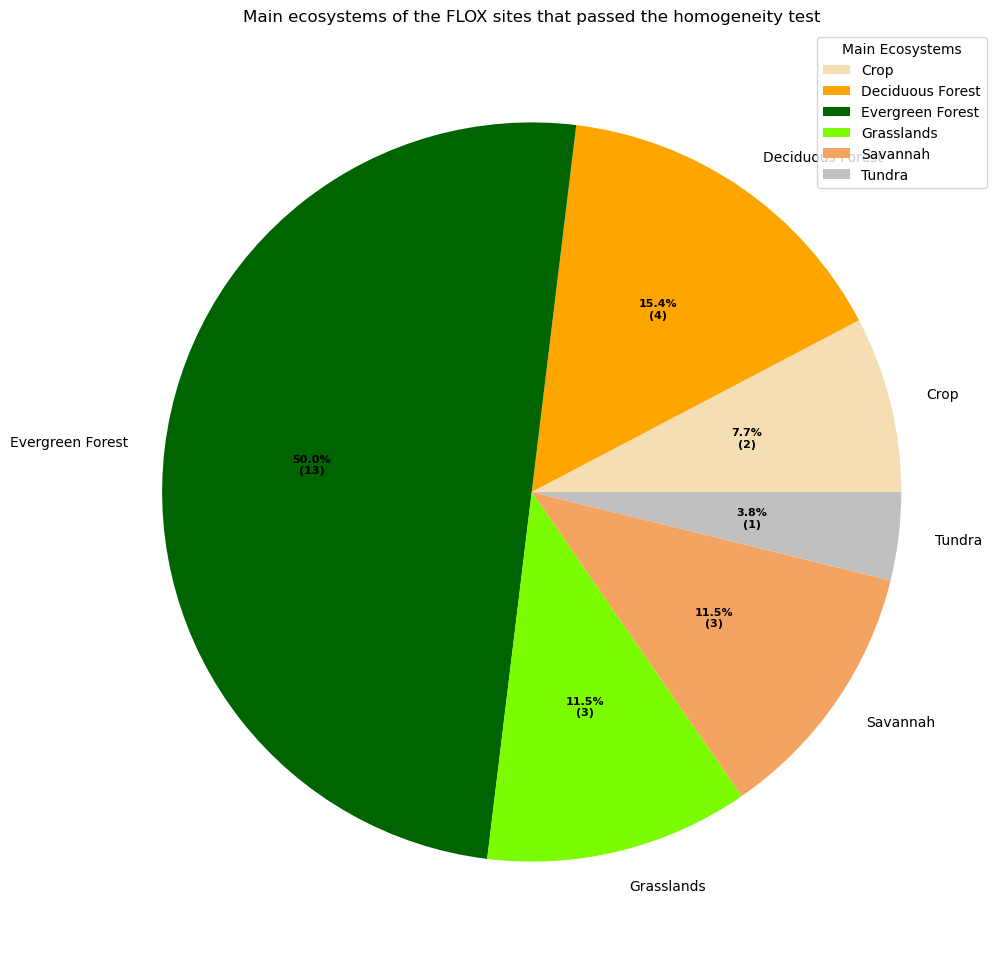

In [39]:
# Creating autocpt arguments

def func(pct, allvalues):
    absolute = int(round((pct / 100.*np.sum(allvalues)), 0))
    return "{:.1f}%\n({:d})".format(pct, absolute)


# Creating plot
fig, ax = plt.subplots(figsize=(12, 12))
wedges, texts, autotexts = ax.pie(df_Passed_Grouped['Site'],
                                  autopct=lambda pct: func(pct, df_Passed_Grouped['Site']),
                                  labels=df_Passed_Grouped['Main ecosystem'],
                                  shadow=False,
                                  colors=mycolors,
                                  startangle=0,
                                  wedgeprops={'linewidth': 0, 'edgecolor': "green"},
                                  textprops=dict(color="black"))



plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Main ecosystems of the FLOX sites that passed the homogeneity test")

# show plot
ax.legend(wedges, df_Passed_Grouped['Main ecosystem'],
          title="Main Ecosystems",
          loc="upper right")
plt.show()

In [40]:
# Group by test-passed and test-failed
df_Test_Grouped = df_FLOX.groupby('Homo Test').count()
df_Test_Grouped = df_Test_Grouped.reset_index()
df_Test_Grouped.head()

,Homo Test,Site,HI Total,Main ecosystem,FLOX Active,Reference network,Latitude,Longitude,Site name,Country,Link
0,No,30,30,30,30,30,30,30,30,30,7
1,Yes,26,26,26,26,26,26,26,26,26,6


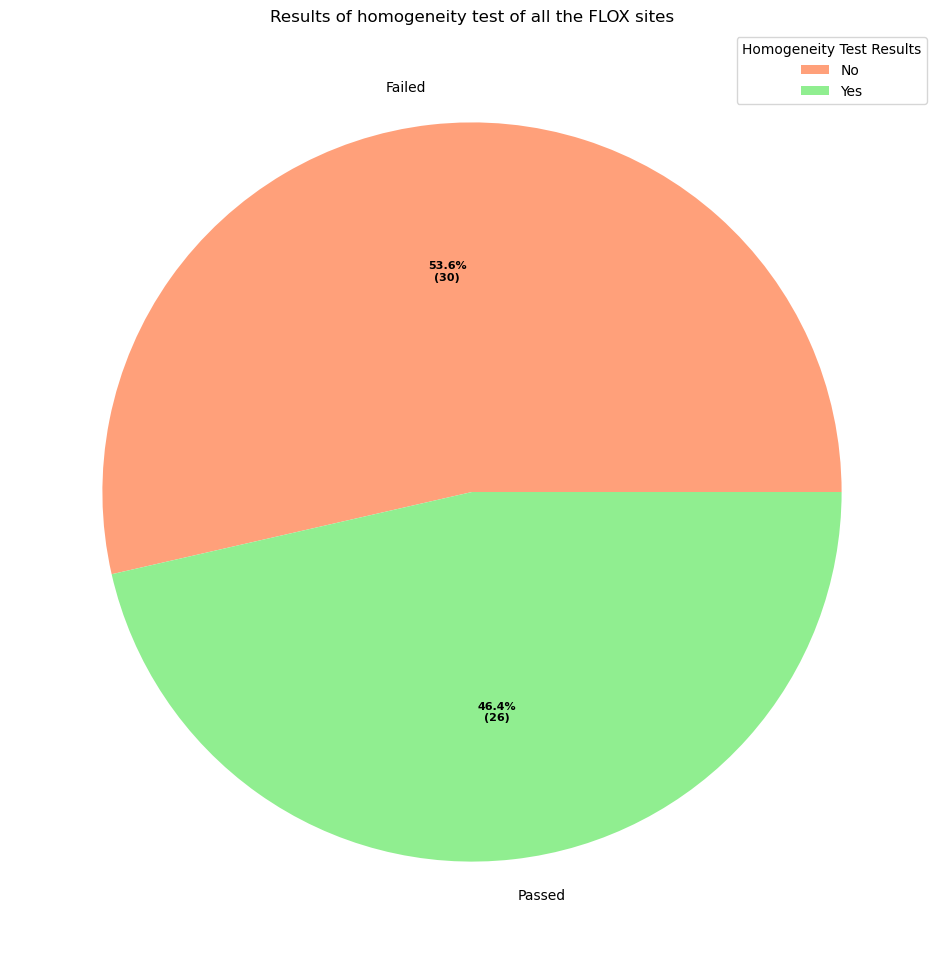

In [41]:
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(round((pct / 100.*np.sum(allvalues)), 0))
    return "{:.1f}%\n({:d})".format(pct, absolute)


# Creating plot
fig, ax = plt.subplots(figsize=(12, 12))
wedges, texts, autotexts = ax.pie(df_Test_Grouped['Site'],
                                  autopct=lambda pct: func(pct, df_Test_Grouped['Site']),
                                  labels=['Failed','Passed'],
                                  shadow=False,
                                  colors=["lightsalmon","lightgreen"],
                                  startangle=0,
                                  wedgeprops={'linewidth': 0, 'edgecolor': "green"},
                                  textprops=dict(color="black"))



plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Results of homogeneity test of all the FLOX sites")

# show plot
ax.legend(wedges, df_Test_Grouped['Homo Test'],
          title="Homogeneity Test Results",
          loc="upper right")
plt.show()

In [42]:
# Group by main ecosystems
df_Eco_Grouped = df_FLOX.groupby('Main ecosystem').count()
df_Eco_Grouped = df_Eco_Grouped.reset_index()
df_Eco_Grouped.head()

,Main ecosystem,Site,HI Total,Homo Test,FLOX Active,Reference network,Latitude,Longitude,Site name,Country,Link
0,Crop,20,20,20,20,20,20,20,20,20,3
1,Deciduous Forest,10,10,10,10,10,10,10,10,10,3
2,Evergreen Forest,16,16,16,16,16,16,16,16,16,6
3,Grasslands,3,3,3,3,3,3,3,3,3,1
4,Savannah,4,4,4,4,4,4,4,4,4,0


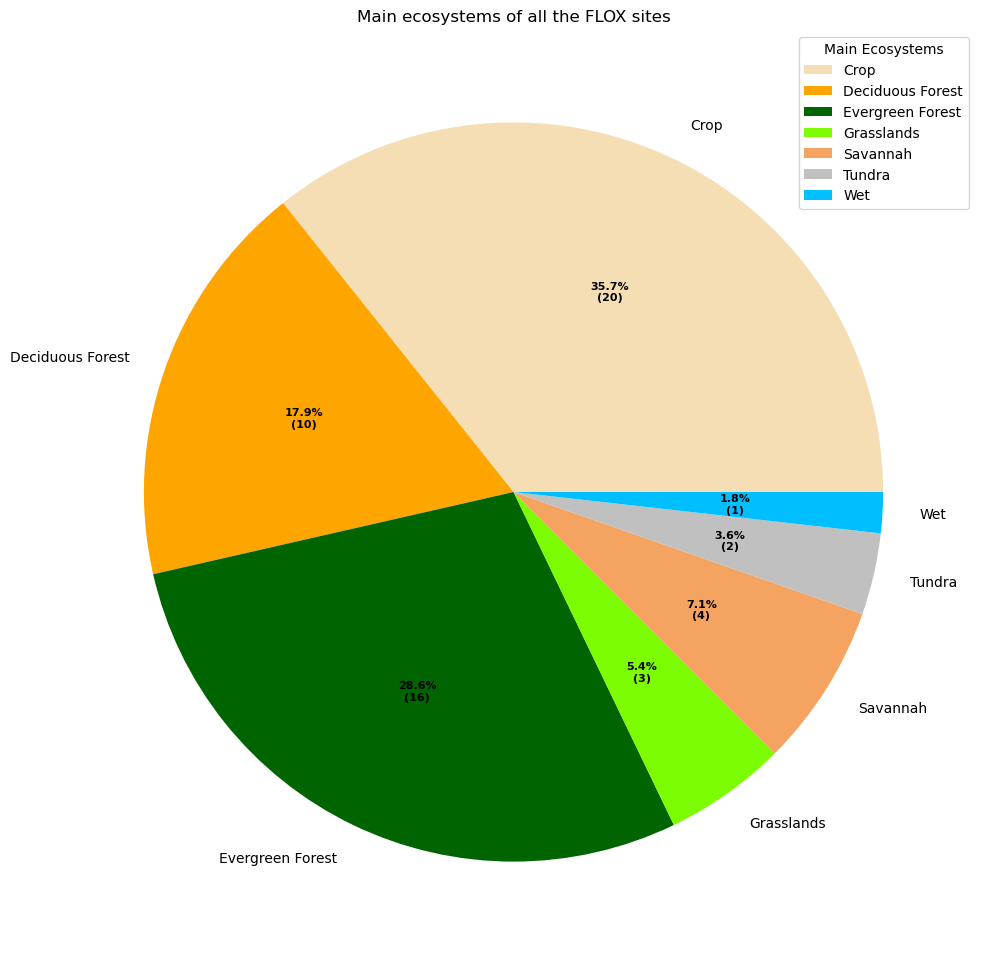

In [43]:
def func(pct, allvalues):
    absolute = int(round((pct / 100.*np.sum(allvalues)), 0))
    return "{:.1f}%\n({:d})".format(pct, absolute)


# Creating plot
fig, ax = plt.subplots(figsize=(12, 12))
wedges, texts, autotexts = ax.pie(df_Eco_Grouped['Site'],
                                  autopct=lambda pct: func(pct, df_Eco_Grouped['Site']),
                                  labels=df_Eco_Grouped['Main ecosystem'],
                                  shadow=False,
                                  colors=mycolors,
                                  startangle=0,
                                  wedgeprops={'linewidth': 0, 'edgecolor': "green"},
                                  textprops=dict(color="black"))



plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Main ecosystems of all the FLOX sites")

# show plot
ax.legend(wedges, df_Eco_Grouped['Main ecosystem'],
          title="Main Ecosystems",
          loc="upper right")
plt.show()

In [44]:
# Filter the sites which passed homogeneity test
df_Failed = df_FLOX[df_FLOX['Homo Test'] == 'No']
df_Failed.head()

,Site,HI Total,Homo Test,Main ecosystem,FLOX Active,Reference network,Latitude,Longitude,Site name,Country,Link
26,FINLAND SWAMP,0.012275,No,Wet,No,FLOX,67.997300,24.209500,FINLAND SWAMP,Finland,NaN
27,IT-BOZEN,0.013479,No,Crop,No,FLOX,46.404200,11.251800,IT - BOZEN,Italy,NaN
28,SVALBARD,0.015973,No,Tundra,Yes,FLOX,78.185400,15.925900,SVALBARD,Norway,NaN
29,DE-LEIPZIG,0.017005,No,Deciduous Forest,Possible,FLOX,51.365400,12.309300,DE -LEIPZIG,Germany,NaN
30,PORT-FOR,0.018665,No,Savannah,Yes,FLOX,38.821972,-8.817312,PORT - FOR,Portugal,NaN


In [45]:
# Group by the main ecosystem
df_Failed_Grouped = df_Failed.groupby('Main ecosystem').count()
df_Failed_Grouped = df_Failed_Grouped.reset_index()
df_Failed_Grouped

,Main ecosystem,Site,HI Total,Homo Test,FLOX Active,Reference network,Latitude,Longitude,Site name,Country,Link
0,Crop,18,18,18,18,18,18,18,18,18,3
1,Deciduous Forest,6,6,6,6,6,6,6,6,6,3
2,Evergreen Forest,3,3,3,3,3,3,3,3,3,1
3,Savannah,1,1,1,1,1,1,1,1,1,0
4,Tundra,1,1,1,1,1,1,1,1,1,0
5,Wet,1,1,1,1,1,1,1,1,1,0


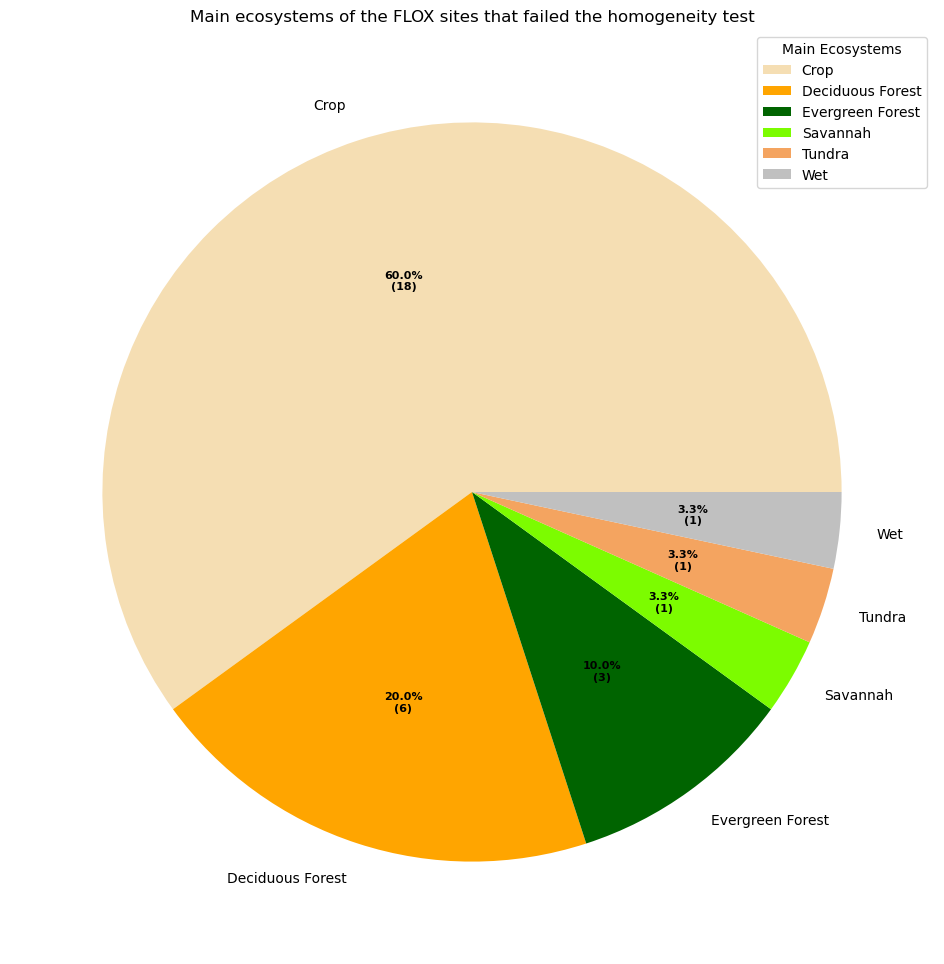

In [46]:
# Creating autocpt arguments


def func(pct, allvalues):
    absolute = int(round((pct / 100.*np.sum(allvalues)), 0))
    return "{:.1f}%\n({:d})".format(pct, absolute)


# Creating plot
fig, ax = plt.subplots(figsize=(12, 12))
wedges, texts, autotexts = ax.pie(df_Failed_Grouped['Site'],
                                  autopct=lambda pct: func(pct, df_Failed_Grouped['Site']),
                                  labels=df_Failed_Grouped['Main ecosystem'],
                                  shadow=False,
                                  colors=mycolors,
                                  startangle=0,
                                  wedgeprops={'linewidth': 0, 'edgecolor': "green"},
                                  textprops=dict(color="black"))



plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Main ecosystems of the FLOX sites that failed the homogeneity test")

# show plot
ax.legend(wedges, df_Failed_Grouped['Main ecosystem'],
          title="Main Ecosystems",
          loc="upper right")
plt.show()